In [40]:
import pandas as pd


covid_data = pd.read_csv('covid_data/covid_data.csv')
display(covid_data.head())

,date,province/state,country,confirmed,deaths,recovered
0,01/22/2020,Anhui,China,1.0,0.0,0.0
1,01/22/2020,Beijing,China,14.0,0.0,0.0
2,01/22/2020,Chongqing,China,6.0,0.0,0.0
3,01/22/2020,Fujian,China,1.0,0.0,0.0
4,01/22/2020,Gansu,China,0.0,0.0,0.0


In [41]:
vaccinations_data = pd.read_csv('covid_data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.head())

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,0.0,NaN,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi..."


In [42]:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()

In [43]:
covid_data['date'] = pd.to_datetime(covid_data['date'])

In [44]:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']

In [45]:
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()

In [46]:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])

In [47]:
display(covid_data['date'].min())
display(covid_data['date'].max())

display(vaccinations_data['date'].min())
display(vaccinations_data['date'].max())

Timestamp('2020-01-22 00:00:00')

Timestamp('2021-05-29 00:00:00')

Timestamp('2020-12-02 00:00:00')

Timestamp('2021-09-06 00:00:00')

In [48]:
merge_mask = ('2020-01-22' <= vaccinations_data['date']) & (vaccinations_data['date'] <= '2021-05-29')
covid_df = vaccinations_data[merge_mask].merge(
    covid_data,
    on=['date','country'],
    how='right'
)
display(covid_df.head())


,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered
0,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,NaN,NaN,NaN
1,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [49]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86785 entries, 0 to 86784
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              86785 non-null  object        
 1   date                                 86785 non-null  datetime64[ns]
 2   total_vaccinations                   10629 non-null  float64       
 3   people_vaccinated                    10007 non-null  float64       
 4   people_vaccinated_per_hundred        10007 non-null  float64       
 5   people_fully_vaccinated              7695 non-null   float64       
 6   people_fully_vaccinated_per_hundred  7695 non-null   float64       
 7   daily_vaccinations                   18264 non-null  float64       
 8   vaccines                             18451 non-null  object        
 9   confirmed                            86785 non-null  float64       
 10  deaths    

In [50]:
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100

In [51]:
display(covid_df.head())

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,death_rate,recover_rate
0,Afghanistan,2020-02-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0
1,Afghanistan,2020-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,2020-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2020-02-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2020-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [52]:
display(
    covid_df['death_rate']
    [covid_df['country'] == 'United States'].max().round(2)
    )

display(
    covid_df['recover_rate']
    [covid_df['country'] == 'Russia'].mean().round(2)
    )

7.19

67.06

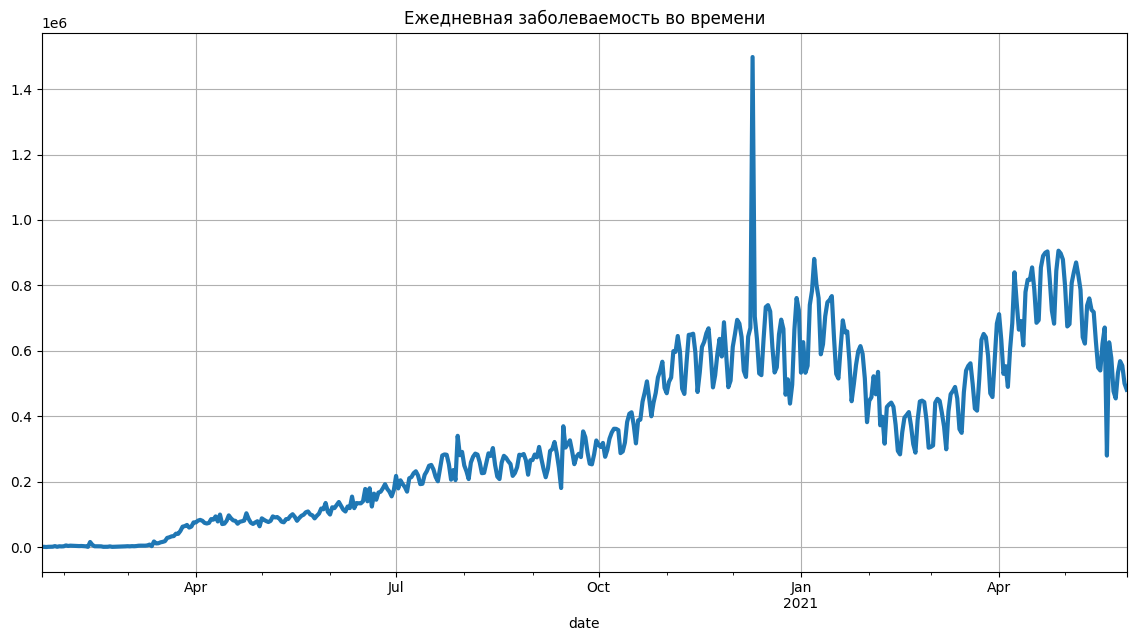

In [53]:
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(14, 7),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);

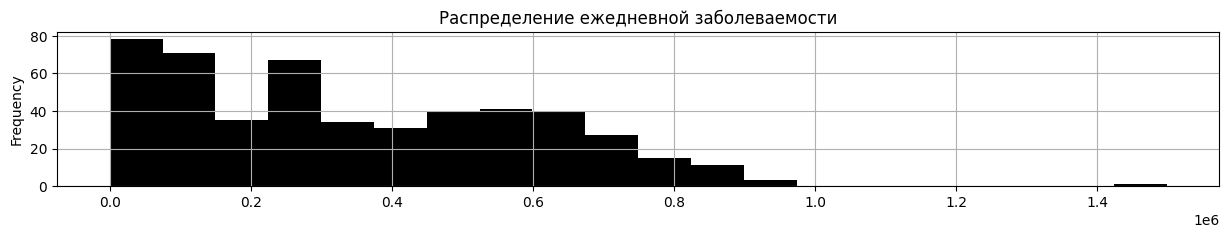

In [95]:
grouped_cases.plot(
    kind='hist',
    figsize=(15, 2),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=20
);

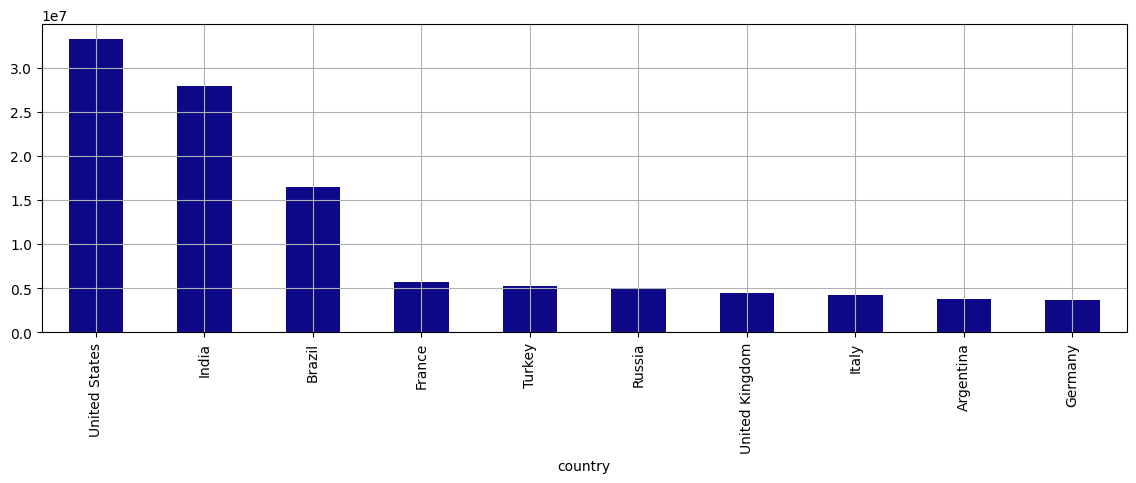

In [102]:
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(14, 4),
    colormap='plasma'
);

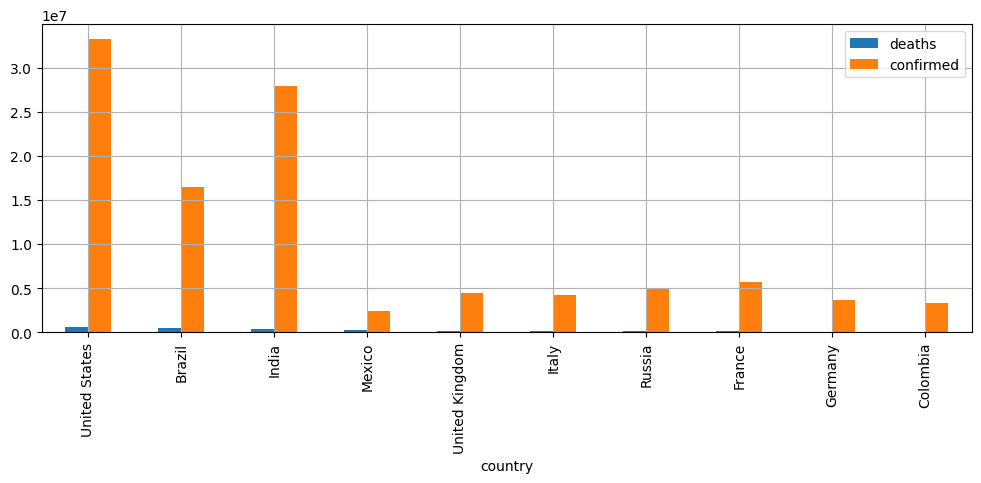

In [56]:
grouped_country = covid_df.groupby(['country'])[['deaths', 'confirmed']].last()
grouped_country = grouped_country.nlargest(10, columns=['deaths'])
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
);

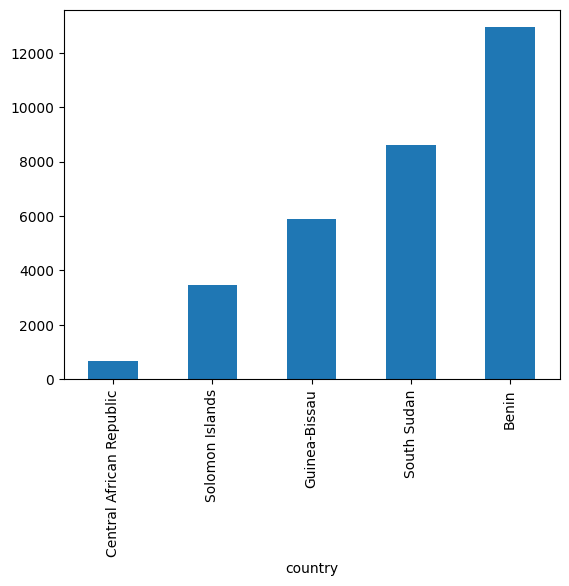

In [57]:
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

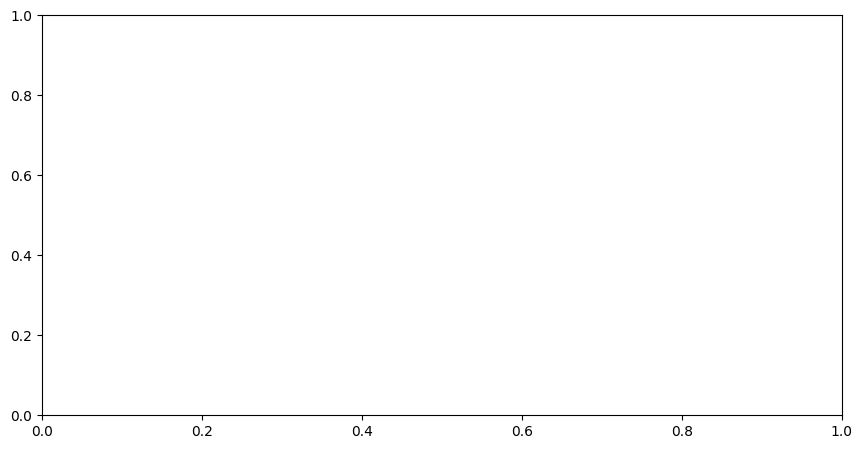

In [59]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])

,country,date,total_vaccinations,people_vaccinated,people_vaccinated_per_hundred,people_fully_vaccinated,people_fully_vaccinated_per_hundred,daily_vaccinations,vaccines,confirmed,deaths,recovered,active,daily_confirmed,daily_deaths,daily_recovered,death_rate,recover_rate
82542,United States,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,NaN,NaN,NaN,0.0,0.0
82543,United States,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
82544,United States,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
82545,United States,2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
82546,United States,2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,0.0


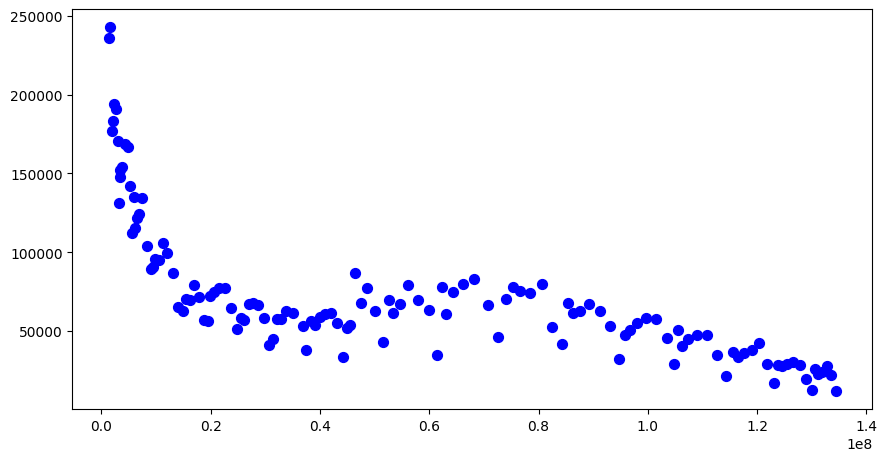

In [108]:
us_data = covid_df[covid_df['country'] == 'United States']
display(us_data.head())


fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=us_data['people_fully_vaccinated'], 
    y=us_data['daily_confirmed'], 
    s=50,
    marker='o',
    c = 'blue'
);

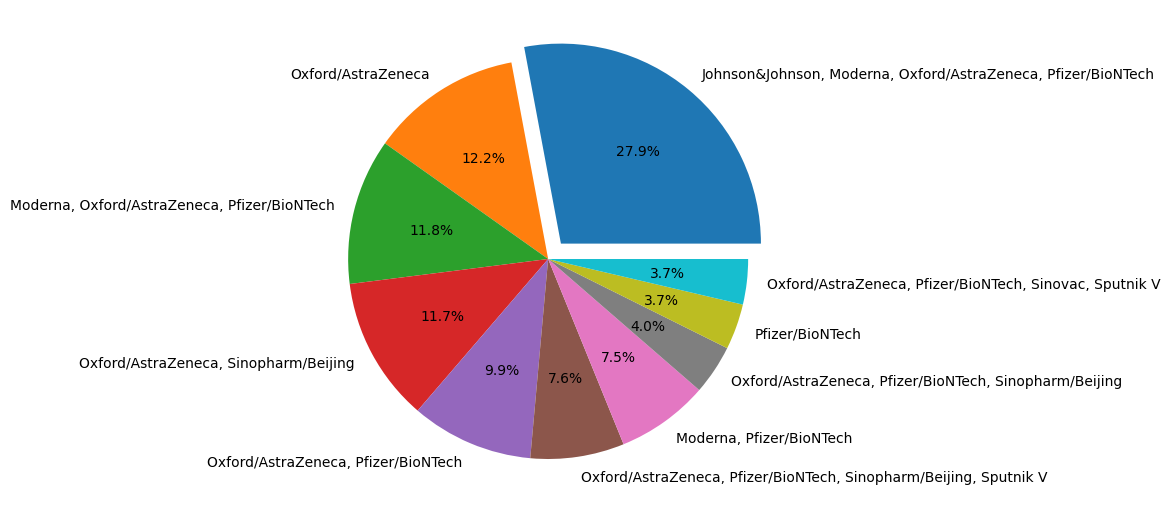

In [69]:
vaccine_combinations = covid_df['vaccines'].value_counts()[:10]
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccine_combinations,
    labels=vaccine_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
);

In [71]:
combination_not_nan = covid_df.dropna(subset=['vaccines'])
combination_last = combination_not_nan.groupby(['country'])['vaccines'].last()
display(combination_last)

country
Afghanistan    Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...
Albania        Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...
Algeria         Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Andorra                      Oxford/AstraZeneca, Pfizer/BioNTech
Angola                                        Oxford/AstraZeneca
                                     ...                        
Venezuela          Sinopharm/Beijing, Sinopharm/Wuhan, Sputnik V
Vietnam        Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...
Yemen                                         Oxford/AstraZeneca
Zambia                     Oxford/AstraZeneca, Sinopharm/Beijing
Zimbabwe       Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...
Name: vaccines, Length: 174, dtype: object

In [72]:
combination_last = combination_last.apply(lambda x: x.replace(' ', '').split(','))

In [75]:
vaccines_dict={}
vaccines_dict = {} 
#создаём цикл по элементам Series combination_last
for vaccines_list in combination_last:
    #создаём цикл по элементам списка с вакцинами
    for vaccine in vaccines_list:
        #проверяем условие, что текущей вакцины ещё нет среди ключей словаря
        if vaccine not in vaccines_dict:#если условие выполняется
            vaccines_dict[vaccine] = 1 #заносим вакцину в словарь со значением 1
        else: #в противном случае
            vaccines_dict[vaccine] += 1 #увеличивает количество

In [77]:
vaccines = pd.Series(vaccines_dict).sort_values(ascending=False)
vaccines['other'] = vaccines[7:].sum()
vaccines = vaccines.sort_values(ascending=False)[:8]


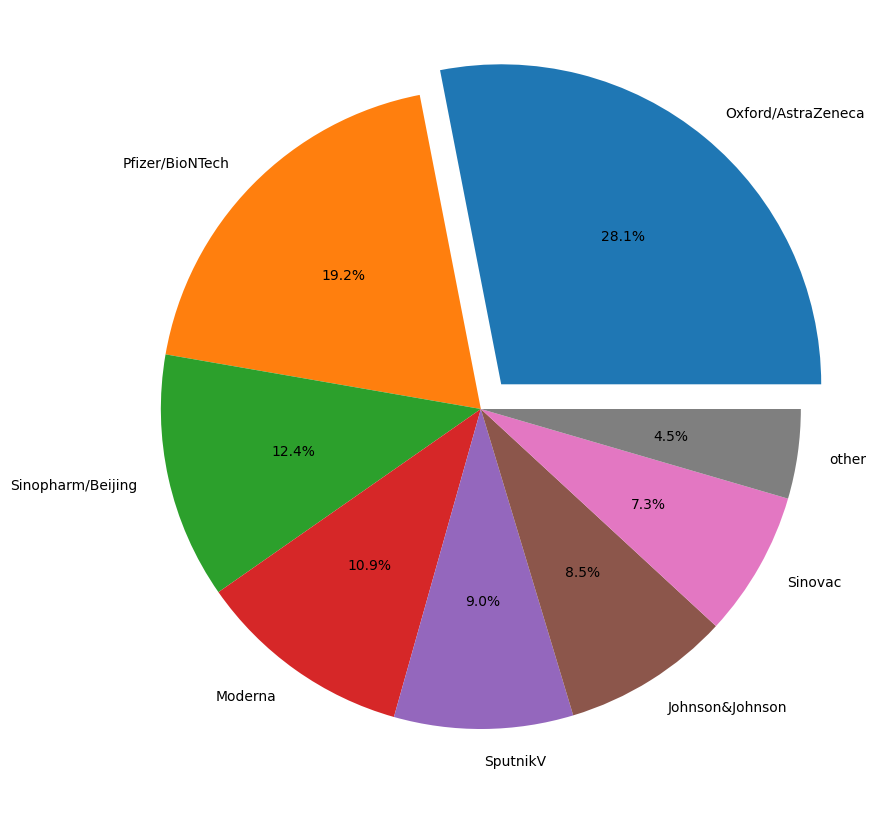

In [87]:
fig = plt.figure(figsize=(9, 8))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    vaccines,
    labels=vaccines.index,
    autopct='%.1f%%',
    explode = [0.1, 0, 0, 0, 0, 0, 0, 0]
);

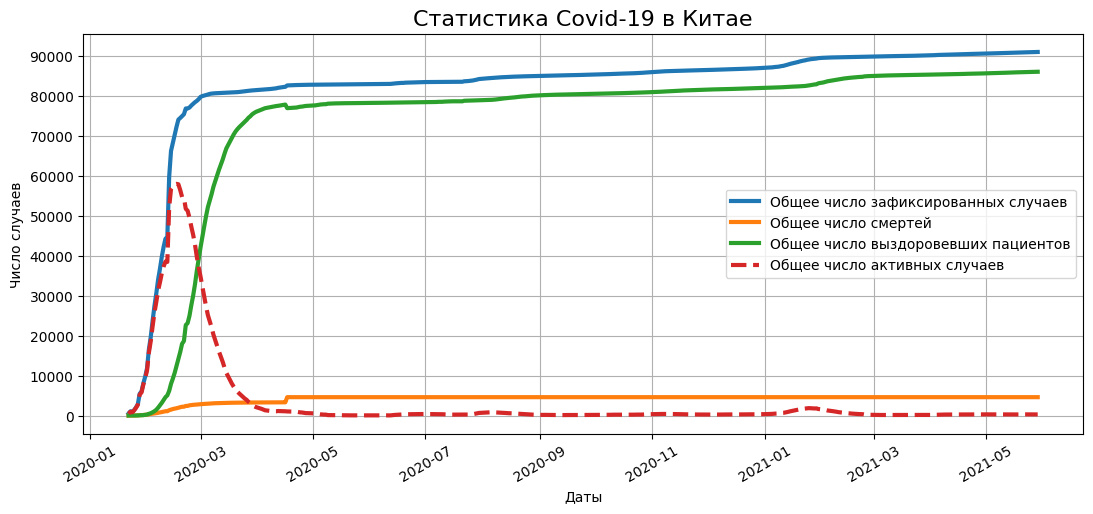

In [103]:
china_data = covid_df[covid_df['country'] == 'China']
china_grouped = china_data.groupby(['date'])[['confirmed', 'active', 'deaths', 'recovered']].sum()

#визуализация графиков
fig = plt.figure(figsize=(10, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(china_grouped['confirmed'], label='Общее число зафиксированных случаев', lw=3)
axes.plot(china_grouped['deaths'], label='Общее число смертей', lw=3)
axes.plot(china_grouped['recovered'], label='Общее число выздоровевших пациентов', lw=3)
axes.plot(china_grouped['active'], label='Общее число активных случаев', lw=3, linestyle='dashed')

#установка параметров отображения
axes.set_title('Статистика Covid-19 в Китае', fontsize=16)
axes.set_xlabel('Даты')
axes.set_ylabel('Число случаев')
axes.set_yticks(range(0, 100000, 10000))
axes.xaxis.set_tick_params(rotation=30)
axes.grid()
axes.legend();

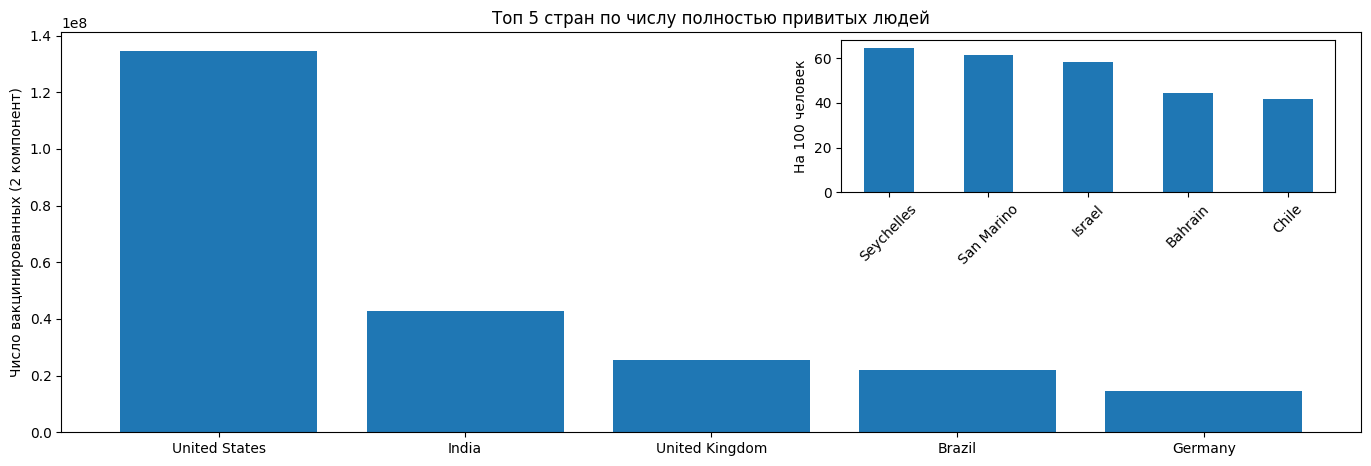

In [104]:
vacc_country = covid_df.groupby('country')['people_fully_vaccinated'].last().nlargest(5)
vacc_country_per_hundred = covid_df.groupby('country')['people_fully_vaccinated_per_hundred'].last().nlargest(5)

#визуализация главного графика
fig = plt.figure(figsize=(13, 4))
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.bar(x = vacc_country.index, height = vacc_country);
main_axes.set_ylabel('Число вакцинированных (2 компонент)')
main_axes.set_title('Топ 5 стран по числу полностью привитых людей')

#визуализация вспомогательного графика
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = vacc_country_per_hundred.index, height = vacc_country_per_hundred, width=0.5);
insert_axes.set_ylabel('На 100 человек')
insert_axes.xaxis.set_tick_params(rotation=45)

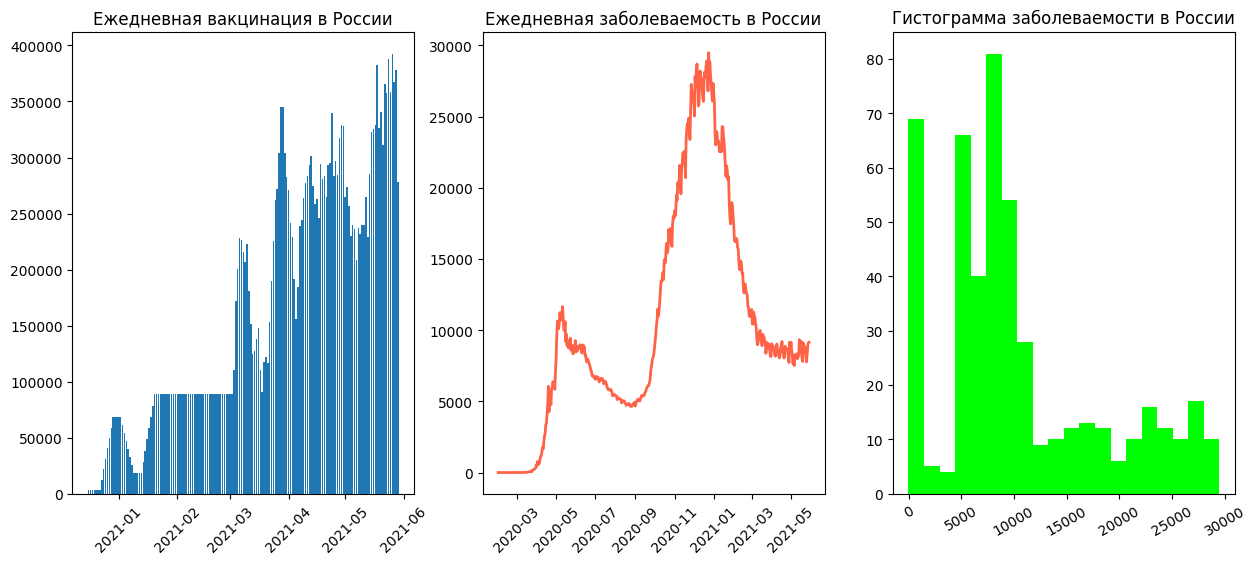

In [109]:
russia_data = covid_df[covid_df["country"] == "Russia"]

# визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# столбчатая диаграмма
axes[0].bar(
    x=russia_data["date"],
    height=russia_data["daily_vaccinations"],
    label="Число вакцинированных",
)
axes[0].set_title("Ежедневная вакцинация в России")
axes[0].xaxis.set_tick_params(rotation=45)

# линейный график
axes[1].plot(
    russia_data["date"],
    russia_data["daily_confirmed"],
    label="Число заболевших",
    color="tomato",
    lw=2,
)
axes[1].set_title("Ежедневная заболеваемость в России")
axes[1].xaxis.set_tick_params(rotation=45)

# гистограмма
axes[2].hist(
    x=russia_data["daily_confirmed"], label=["Число заболевших"], color="lime", bins=20
)
axes[2].set_title("Гистограмма заболеваемости в России")
axes[2].xaxis.set_tick_params(rotation=30)

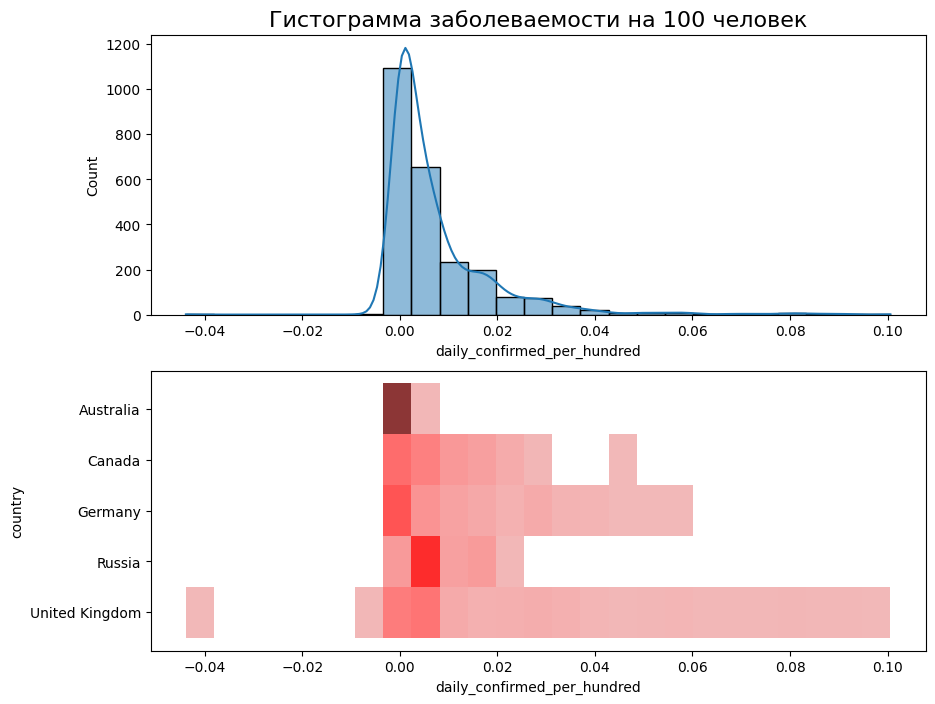

In [112]:
import seaborn as sns


countries = ['Russia', 'Australia', 'Germany', 'Canada', 'United Kingdom']
cropped_covid_df = covid_df[covid_df['country'].isin(countries)]

populations = pd.DataFrame([
    ['Canada', 37664517],
    ['Germany', 83721496],
    ['Russia', 145975300],
    ['Australia', 25726900],
    ['United Kingdom', 67802690]
    ],
    columns=['country', 'population']
)

cropped_covid_df = cropped_covid_df.merge(populations, on='country')
cropped_covid_df['daily_confirmed_per_hundred'] = cropped_covid_df['daily_confirmed'] / cropped_covid_df['population'] * 100
cropped_covid_df.head()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
sns.histplot(
    data = cropped_covid_df,
    x = 'daily_confirmed_per_hundred',
    bins = 25,
    kde = True,
    ax = axes[0]
);
axes[0].set_title('Гистограмма заболеваемости на 100 человек', fontsize=16)
sns.histplot(
    data = cropped_covid_df,
    x = 'daily_confirmed_per_hundred',
    y = 'country',
    bins = 25,
    color = 'red',
    ax = axes[1]
);


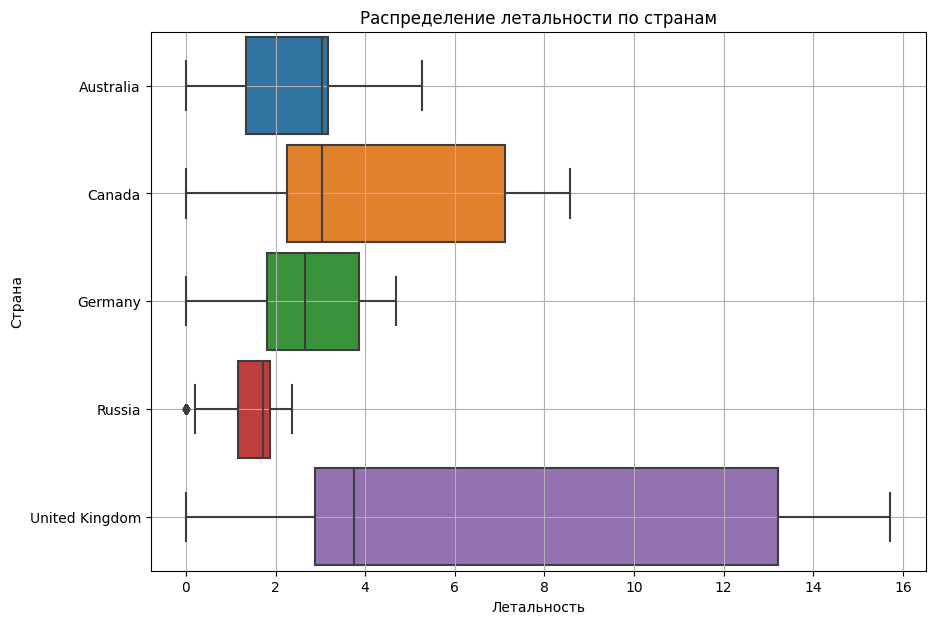

In [113]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data = cropped_covid_df,
    y = 'country',
    x = 'death_rate',
    orient = 'h',
    width=0.9
)

boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()


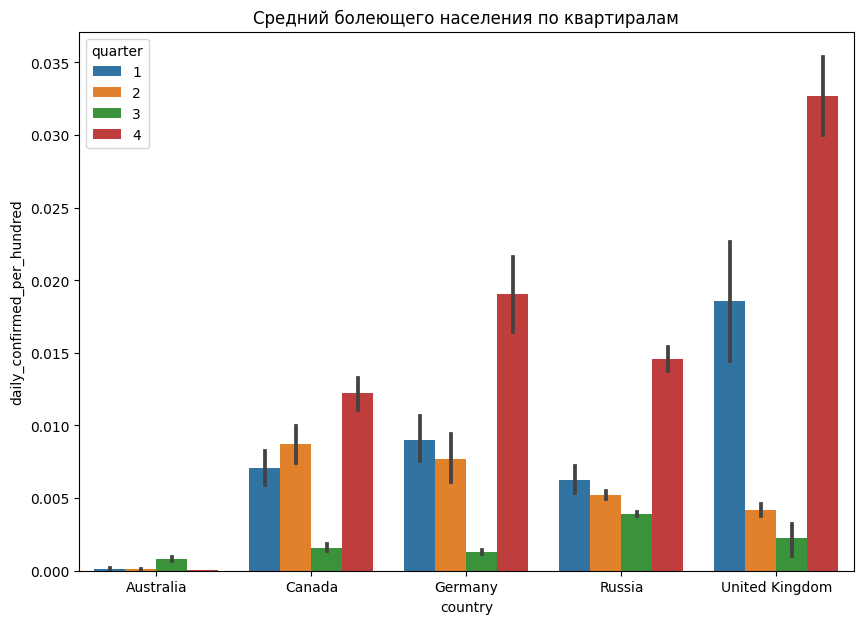

In [114]:
fig = plt.figure(figsize=(10, 7))
cropped_covid_df['quarter'] = cropped_covid_df['date'].dt.quarter
barplot = sns.barplot(
    data = cropped_covid_df,
    x = 'country',
    y = 'daily_confirmed_per_hundred',
    hue = 'quarter'
);
barplot.set_title('Средний болеющего населения по квартиралам');

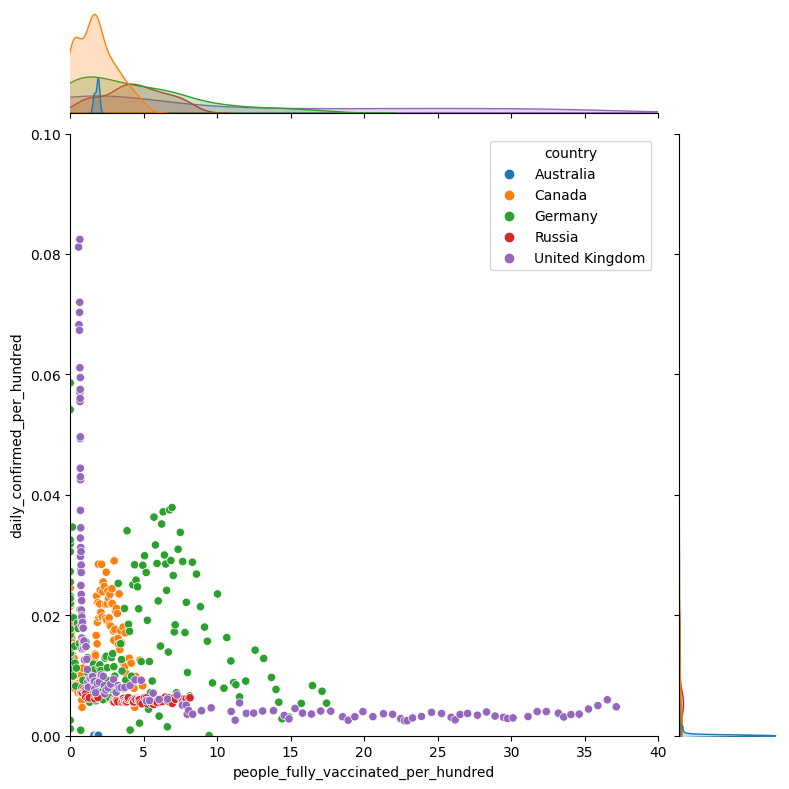

In [115]:
joinplot = sns.jointplot(
    data = cropped_covid_df,
    x = 'people_fully_vaccinated_per_hundred',
    y = 'daily_confirmed_per_hundred',
    hue = 'country',
    xlim = (0, 40),
    ylim = (0, 0.1),
    height = 8
);

In [116]:
pivot = cropped_covid_df.pivot_table(
    values = 'people_vaccinated_per_hundred',
    columns = 'date',
    index = 'country'
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

date,2020-12-13,2020-12-14,2020-12-15,2020-12-16,2020-12-17,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,...,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28,2021-05-29
country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.40,12.69,12.88,13.28,13.73,14.18
Canada,NaN,0.0,0.00,0.01,0.02,0.03,0.03,0.03,0.05,0.07,...,48.10,49.25,50.14,50.89,51.77,52.39,53.05,53.95,54.99,55.71
Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.18,39.68,39.95,40.11,40.29,40.64,41.29,41.87,42.40,42.61
Russia,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.04,...,10.20,10.30,10.50,10.53,10.70,10.81,11.07,11.12,11.19,11.29
United Kingdom,0.13,NaN,NaN,NaN,NaN,NaN,NaN,0.99,NaN,NaN,...,55.01,55.33,55.63,55.82,55.99,56.27,56.61,56.99,57.29,57.56


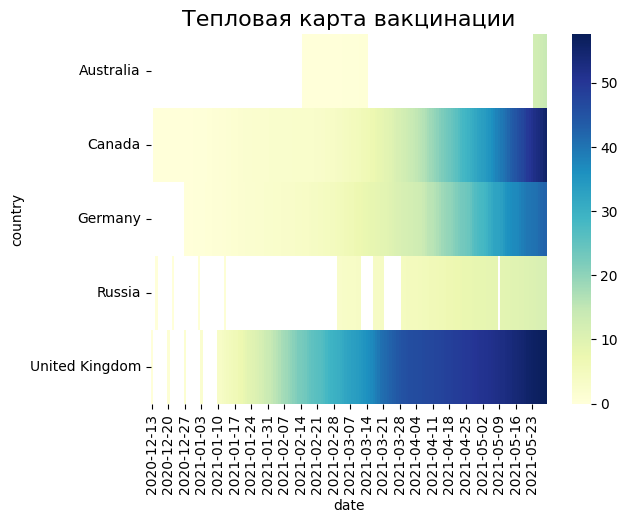

In [117]:
heatmap = sns.heatmap(
    data = pivot,
    cmap = 'YlGnBu'
)
heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

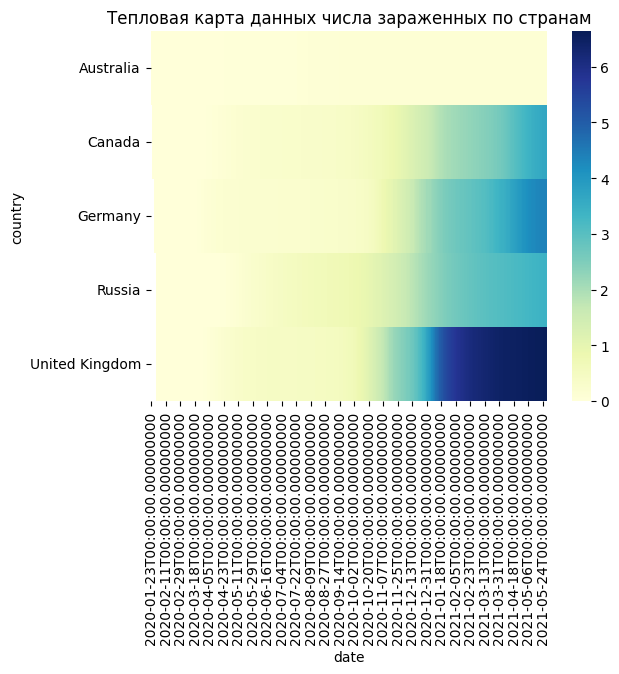

In [127]:
cropped_covid_df['confirmed_per_hundred'] = cropped_covid_df['confirmed'] / cropped_covid_df['population'] * 100
cropped_covid_df.confirmed_per_hundred.head()

pivot2 = cropped_covid_df.pivot_table(
    values = 'confirmed_per_hundred',
    columns = 'date',
    index = 'country'
)

heatmap2 = sns.heatmap(
    data = pivot2,
    cmap = 'YlGnBu'
)
pivot2.columns = pivot2.columns.astype('string')
heatmap2.set_title('Тепловая карта данных числа зараженных по странам');

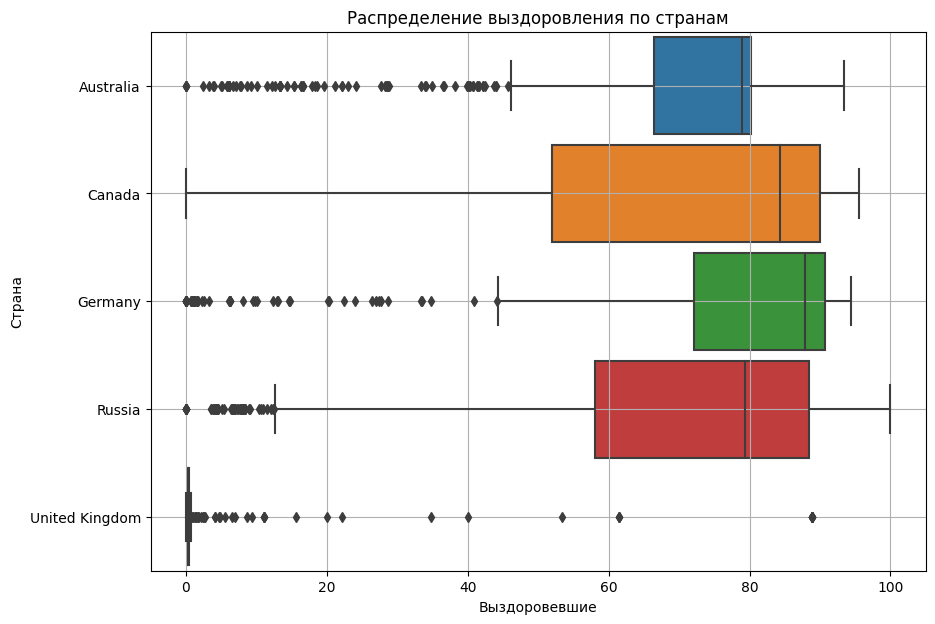

In [128]:
fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data = cropped_covid_df,
    y = 'country',
    x = 'recover_rate',
    width=0.9
)

boxplot.set_title('Распределение выздоровления по странам');
boxplot.set_xlabel('Выздоровевшие');
boxplot.set_ylabel('Страна');
boxplot.grid()